# Application : Optimization

- R에서, `optim`, `nlm`, `optimize`와 같은 최적화 기법들은 인자가 파라미터의 벡터로 구성된 함수를 전달하도록 요구한다 (e.g. a log-likelihood)
- 하지만, 목적 함수는 파라미터 외에도 다른 것들에 의존할 수 있다
- 최적화 프로그램을 설계할 때, 사용자들이 며몇 파라미터를 고정된 상태로 두도록 하는 것이 바람직할 때가 있다

아래서 살펴볼 "생성자 함수(Constructor Function)"는 함수를 리턴하는 함수이다.

즉, 다른 함수를 '생성'하는 함수이다.


### 1. Maximizing a Normal Likelihood


In [24]:
# Write a "constructor" function
# Optimization func in R minimize functions, so you should use negative log-like

make.NegLogLik <- function(data, fixed=c(FALSE, FALSE)) {
    params <- fixed
    function(p) {
        params[!fixed] <- p
        mu <- params[1]
        sigma <- params[2]
        a <- -0.5*length(data)*log(2*pi*sigma^2)
        b <- -0.5*sum((data-mu)^2) / (sigma^2)
        -(a+b)
    }
}

In [25]:
set.seed(1); normals <- rnorm(100, 1, 2)

nLL <- make.NegLogLik(normals)
print(nLL)

# 여기서는 environment가 출력이 되는데, 전역 환경에서 정의된 함수와 달리
# 함수 내의 함수는 포인터가 생기기 때문에 그것을 알려주기 위함이

function(p) {
        params[!fixed] <- p
        mu <- params[1]
        sigma <- params[2]
        a <- -0.5*length(data)*log(2*pi*sigma^2)
        b <- -0.5*sum((data-mu)^2) / (sigma^2)
        -(a+b)
    }
<bytecode: 0x5567237bead0>
<environment: 0x5567230e78e0>


In [26]:
ls(environment(nLL))

[1] "data"   "fixed"  "params"

### 2. Estimating Parameters

In [27]:
optim(c(mu = 0, sigma = 1), nLL)$par

mu    sigma 
1.218239 1.787343

In [28]:
# Fixing sigma = 2
nLL <- make.NegLogLik(normals, c(FALSE, 2))
optimize(nLL, c(-1, 3))$minimum

[1] 1.217775

In [29]:
# Fixing mu = 1
nLL <- make.NegLogLik(normals, c(1, FALSE))
optimize(nLL, c(1e-6, 10))$minimum

[1] 1.800596

### 3. Plotting the Likelihood

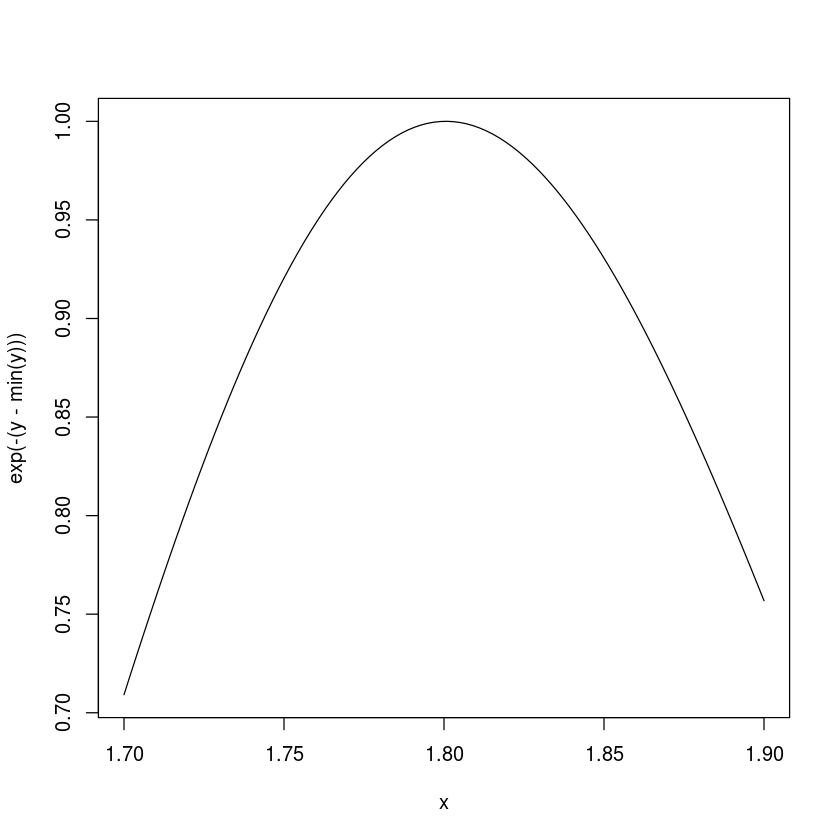

In [31]:
nLL <- make.NegLogLik(normals, c(1, FALSE))
x <- seq(1.7, 1.9, len = 100)
y <- sapply(x, nLL)
plot(x, exp(-(y - min(y))), type = "l")

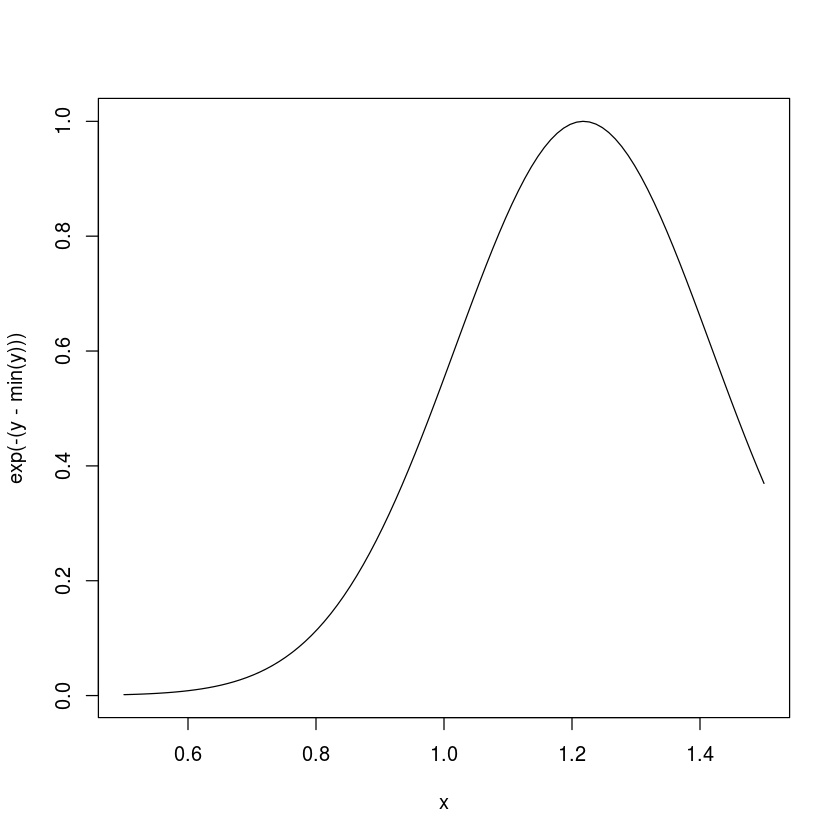

In [32]:
nLL <- make.NegLogLik(normals, c(FALSE, 2))
x <- seq(0.5, 1.5, len = 100)
y <- sapply(x, nLL)
plot(x, exp(-(y - min(y))), type = "l")